回归神经网络（Regression Neural Network）是神经网络在连续数值预测问题中的应用。相比传统回归方法（如线性回归、岭回归等），它通过多层非线性映射可以更好地建模复杂的、高维的、非线性关系。

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [23]:
import pandas as pd
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())  # 查看前5行的数据

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [25]:
# 1. 加载数据
X, y = data.data, data.target.reshape(-1, 1)  # y是(20640, 1)
# 2. 数据标准化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
# 转换为 tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [7]:
# 4. 构建神经网络
class HousePriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.model(x)
model = HousePriceModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# 5. 训练模型
epochs = 1000
for epoch in range(epochs):
    model.train()
    pred = model(X_train)
    loss = criterion(pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 100, Loss: 0.2331
Epoch 200, Loss: 0.1976
Epoch 300, Loss: 0.1925
Epoch 400, Loss: 0.1859
Epoch 500, Loss: 0.1778
Epoch 600, Loss: 0.1720
Epoch 700, Loss: 0.1687
Epoch 800, Loss: 0.1659
Epoch 900, Loss: 0.1705
Epoch 1000, Loss: 0.1625


In [9]:
# 6. 预测与反归一化
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test.numpy())

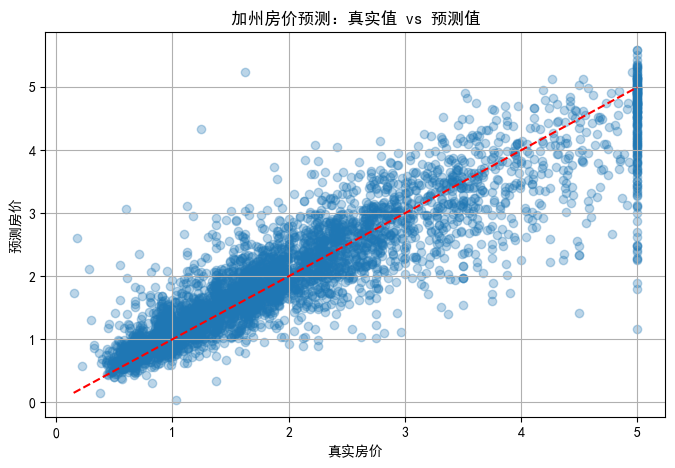

In [13]:
# 7. 绘图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("真实房价")
plt.ylabel("预测房价")
plt.title("加州房价预测：真实值 vs 预测值")
plt.grid(True)
plt.show()